<h1 style="color:Red;" align="center"> Forecasting Using FbProphet-Air Line Passengers </h1>

In [ ]:
! pip install pystan

In [ ]:
! pip install fbprophet

In [ ]:
! conda install -c conda-forge fbprophet

/bin/bash: conda: command not found


In [ ]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv(r'https://raw.githubusercontent.com/krishnaik06/FbProphet/master/airline_passengers.csv')
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [ ]:
df.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


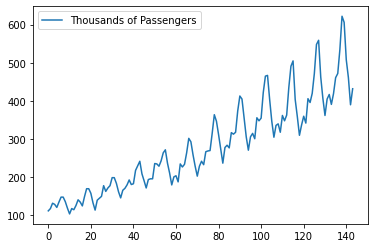

In [ ]:
df.plot()

In [ ]:
df.columns = ['ds','y']
df.head()

,ds,y
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [ ]:
df.drop(144,axis=0,inplace=True)

In [ ]:

df['ds'] = pd.to_datetime(df['ds'])

In [ ]:
df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [ ]:
df.tail()

,ds,y
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0
143,1960-12-01,432.0


In [ ]:
from fbprophet import Prophet

In [ ]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [ ]:
# Initialize the Model
model=Prophet(seasonality_mode='multiplicative',
daily_seasonality = True,
weekly_seasonality= True,
yearly_seasonality = True)
model

In [ ]:
df.columns

Index(['ds', 'y'], dtype='object')

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:

df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [ ]:
from fbprophet import Prophet

In [ ]:
model.fit(df)

In [ ]:
model.component_modes

{'additive': ['additive_terms', 'extra_regressors_additive'],
 'multiplicative': ['yearly',
  'weekly',
  'daily',
  'multiplicative_terms',
  'extra_regressors_multiplicative',
  'holidays']}

In [ ]:
df.tail()

,ds,y
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0
143,1960-12-01,432.0


In [ ]:

### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [ ]:
future_dates.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


In [ ]:
prediction=model.predict(future_dates)

prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1949-01-01,34.601442,101.681346,122.586605,34.601442,34.601442,2.543266,2.543266,2.543266,2.248497,2.248497,2.248497,0.015729,0.015729,0.015729,-0.310498,-0.310498,-0.310498,0.0,0.0,0.0,112.402687
1,1949-02-01,34.767536,94.408306,115.298750,34.767536,34.767536,2.543266,2.543266,2.543266,2.008924,2.008924,2.008924,-0.037532,-0.037532,-0.037532,-0.496809,-0.496809,-0.496809,0.0,0.0,0.0,104.612880
2,1949-03-01,34.917557,108.682544,130.841847,34.917557,34.917557,2.543266,2.543266,2.543266,2.428370,2.428370,2.428370,-0.037532,-0.037532,-0.037532,-0.077364,-0.077364,-0.077364,0.0,0.0,0.0,119.710288
3,1949-04-01,35.083652,113.079877,133.395751,35.083652,35.083652,2.543266,2.543266,2.543266,2.512059,2.512059,2.512059,0.069841,0.069841,0.069841,-0.101048,-0.101048,-0.101048,0.0,0.0,0.0,123.215841
4,1949-05-01,35.244388,113.236773,134.073553,35.244388,35.244388,2.543266,2.543266,2.543266,2.507600,2.507600,2.507600,0.023101,0.023101,0.023101,-0.058767,-0.058767,-0.058767,0.0,0.0,0.0,123.623208


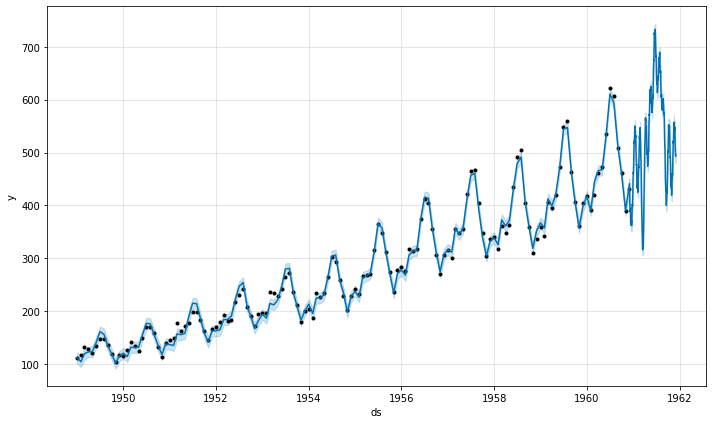

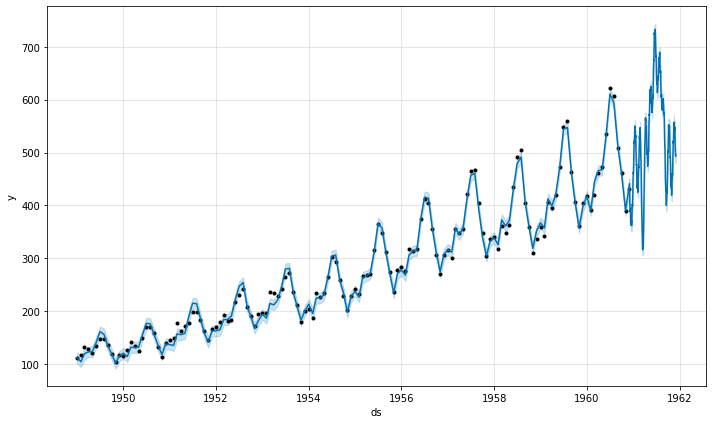

In [ ]:

### plot the predicted projection
model.plot(prediction)

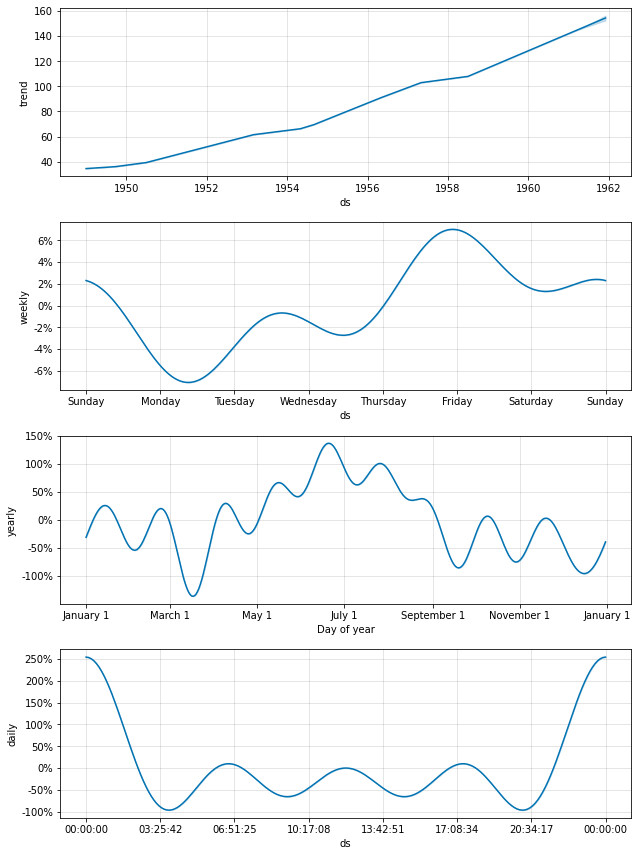

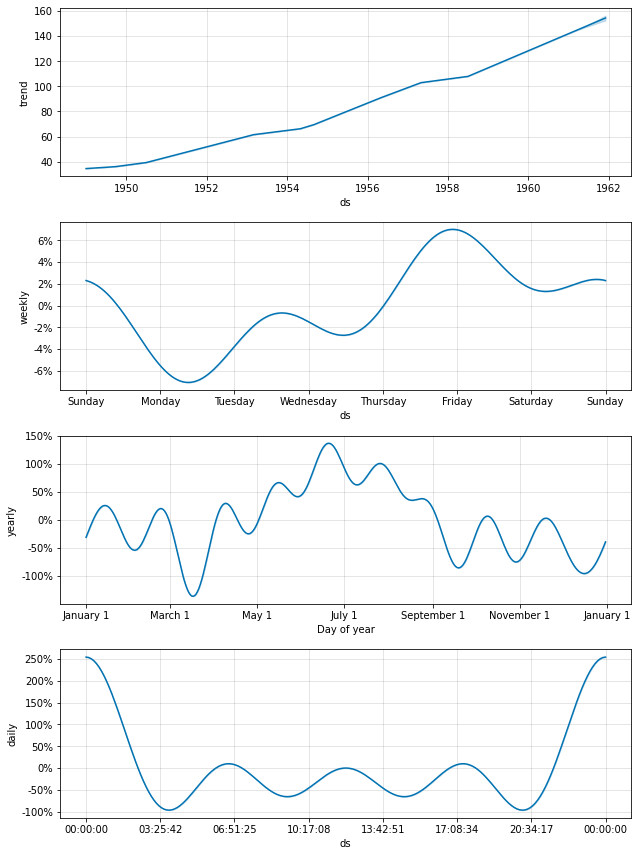

In [ ]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)


Time Series Analysis

- 1960-1962
   - Cross Validation
      - 1960-61---Train dataset
      - 1961-62--Test dataset
      - 1962-63---Validation

In [ ]:
df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 19 forecasts with cutoffs between 1951-01-18 00:00:00 and 1959-12-02 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,78.995261,78.988782,79.000673,150.0,1951-01-18
1,1951-03-01,94.051929,94.026851,94.076268,178.0,1951-01-18
2,1951-04-01,104.516138,104.461606,104.569651,163.0,1951-01-18
3,1951-05-01,162.215721,162.083015,162.336234,172.0,1951-01-18
4,1951-06-01,245.153123,244.863479,245.412144,178.0,1951-01-18


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,40 days,421.306583,20.525754,14.099674,0.058402,0.028903,0.227273
1,42 days,726.162571,26.947404,17.185759,0.076477,0.028903,0.227273
2,46 days,776.283494,27.861865,18.423256,0.084175,0.032743,0.227273
3,47 days,558.963620,23.642411,15.929596,0.064230,0.029466,0.227273
4,48 days,573.034334,23.938136,16.650017,0.067999,0.037847,0.204545


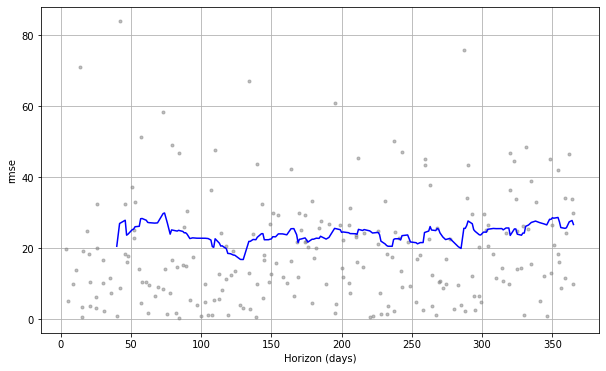

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')